1-+-=
4=

4/0
1/2



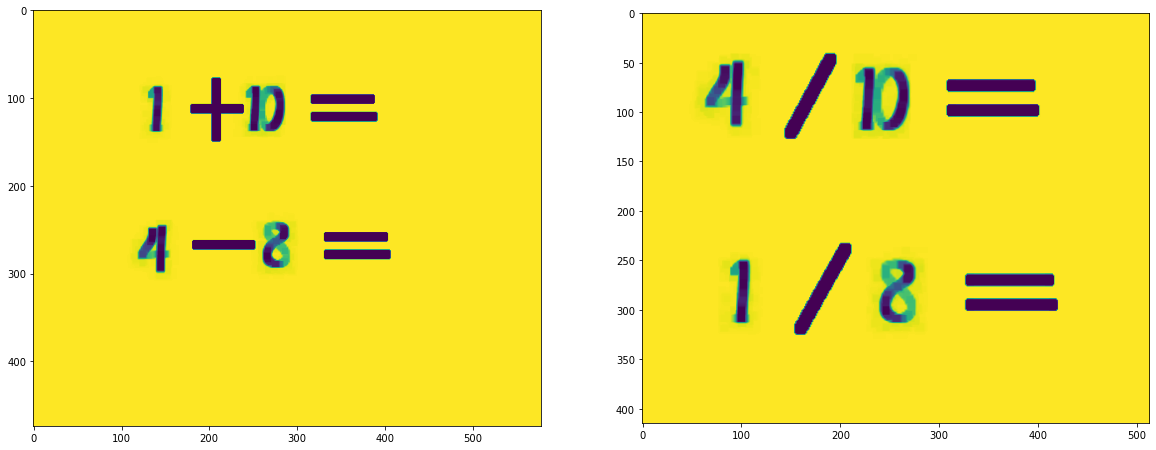

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
from skimage import morphology, feature
import pytesseract

n=2
plt_m=2
plt_n=int(n/plt_m)
fsize=(20,100)

sq1=8
sq2=2
gamma=1.5


pictures=[]
for i in range(n):
    tmp=str(i)
    if(i<10):
        tmp='0'+tmp
    pictures.append(tmp)

def main():
    pytesseract.pytesseract.tesseract_cmd = r'C:\Users\SzP_Technik\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'
    
    global plt_m,plt_n,n
    plt.figure(figsize=fsize)
    sub=1
    
    for table in pictures:
        plt.subplot(plt_n,plt_m,sub)
        image=io.imread('data/calc_'+table+'.png')

        a=np.sum(image[:,:,0])
        b=np.sum(image[:,:,1])
        c=np.sum(image[:,:,2])
        maxi=max(a,b,c)
        tab=[a,b,c]
        for i in range(3):
            if tab[i]==maxi: 
                canal=i
                break
        img=image[:,:,canal]
        
        img = morphology.erosion(img, morphology.square(sq1))
        #img=(img**gamma).astype(np.uint8)
        img = morphology.dilation(img, morphology.square(sq2))
        
        text=pytesseract.image_to_string(img, config='-c tessedit_char_whitelist=+-x/=1234567890')
        print(text)
        
        plt.imshow(img)
        sub+=1
    plt.show()
    
    
if __name__=='__main__':
    main()